# Introduction to Computer Vision - Exercise
---
We will once more use DALL-E generated images, starting with the one we already saw in the lecture material. Instructions for the individual tasks are given in <span style="color:blue">blue</span> color.

---

## Overview
  - [Grayscale Conversion](#Grayscale-Conversion)
  - [Corner detection](#Corner-detection)
- [Object detection](#Object-detection)
  - [Comparing face detectors](#Comparing-face-detectors)
  - [Comparing upper body detectors](#Comparing-upper-body-detectors)
  - [Critical assessment of detectors](#Critical-assessment-of-detectors)

---

In [20]:
# These imports let you use opencv
import cv2 #opencv itself
import numpy as np # matrix manipulations

#the following are to do with this interactive notebook code
%matplotlib inline 
from matplotlib import pyplot as plt # this lets you draw inline pictures in the notebooks
# default size of figures
plt.rcParams['figure.figsize'] = [6, 6]

# we will use imgstr, which makes it easy to use different images
imgstr = 'img/fabel.jpg'

### Grayscale Conversion

We have seen that while we can do the necessary color conversions by hand, there are also built-in OpenCV functions to achieve this. Let us now do both for grayscale.

<div style="color:blue">Let's get started with a little conversion task.</div>

1. <div style="color:blue">Read the input image and obtain the individual channels.</div>
1. <div style="color:blue">Manually create a grayscale image based on the channels.</div>
1. <div style="color:blue">Use the built-in OpenCV funtion to produce a second grayscale image.</div>
1. <div style="color:blue">Display the images side by side, saying which is which.</div>
1. <div style="color:blue">Optionally also display the difference map between the two grascale images.</div>

**Hints**: 
* Check the formula for color conversions [here](https://docs.opencv.org/4.9.0/de/d25/imgproc_color_conversions.html) for the manual part.
* If you do the optional part, investigate a bit further to get an explanation for what you see.

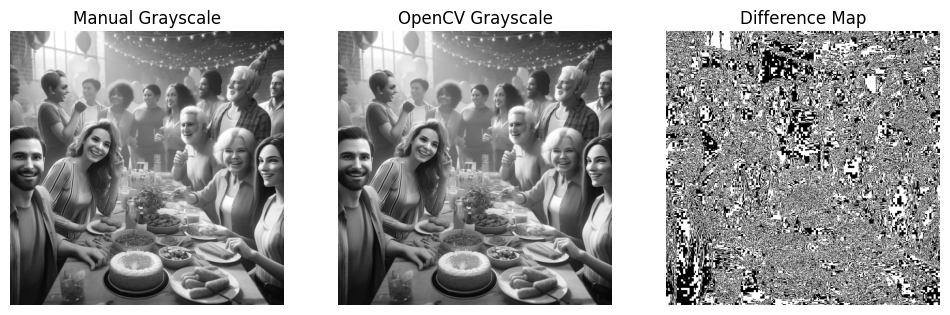

In [25]:
# Your solution goes here: (if you need more code/markdown cells, feel free to insert them as you see fit)

# Loading the image
image_path = 'img/Fest_gemischt.jpg' 
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Converting from BGR to RGB

# Split the channels
R, G, B = cv2.split(img)

# Manually creating a grayscale image
grayscale_manual = 0.2989 * R + 0.5870 * G + 0.1140 * B
grayscale_manual = grayscale_manual.astype(np.uint8)

# Use OpenCV function to create a grayscale image
grayscale_cv = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)


# Displaying the images side by side
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(grayscale_manual, cmap='gray')
plt.title('Manual Grayscale')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(grayscale_cv, cmap='gray')
plt.title('OpenCV Grayscale')
plt.axis('off')

#Optional
# Display the difference map between the two grayscale images
difference = cv2.absdiff(grayscale_manual, grayscale_cv)
plt.subplot(1, 3, 3)
plt.imshow(difference, cmap='gray')
plt.title('Difference Map')
plt.axis('off')

plt.show()



### Corner detection
In the lecture material, we already tried the Harris corner detector.  Here, you should try out a different one and compare the two.

* <div style="color:blue">Use Shi-Tomasi corner detection to find corners in our input image. Compare the result to what the Harris detector finds. Which one do you prefer (and why)?</div>

**Hint:** You can find an example in the [OpenCV tutorials](https://docs.opencv.org/4.9.0/db/d27/tutorial_py_table_of_contents_feature2d.html). Be aware, however, that we want to show the corner points on a color image.

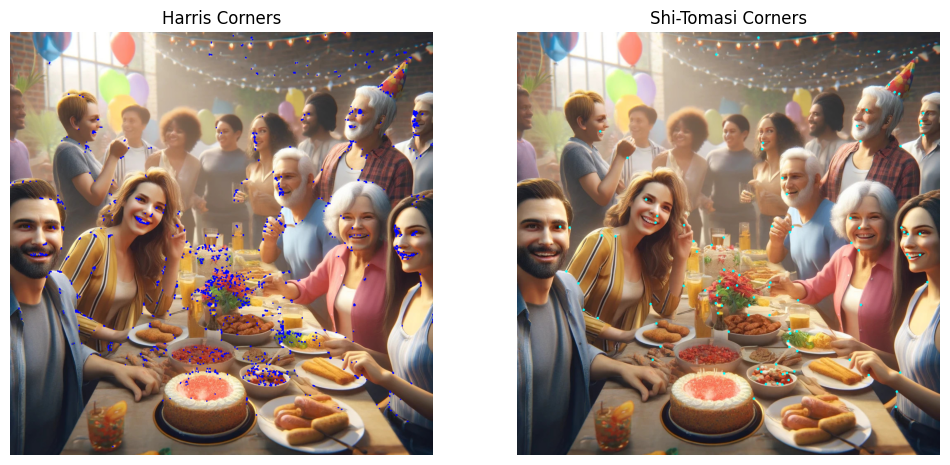

In [28]:
# Your solution goes here:


image_path = 'img/Fest_gemischt.jpg'
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Harris Corner Detection
harris_corners = cv2.cornerHarris(gray, 2, 3, 0.04)
harris_corners = cv2.dilate(harris_corners, None)

    # Creating an image copy to show Harris corners in red
harris_img = img.copy()
harris_img[harris_corners > 0.01 * harris_corners.max()] = [255, 0, 0]

    # Shi-Tomasi Corner Detection
corners = cv2.goodFeaturesToTrack(gray, 100, 0.01, 10)
corners = np.intp(corners) # Convert to integers

    # Creating an image copy to show Shi-Tomasi corners in yellow
shi_tomasi_img = img.copy()
for i in corners:
    x, y = i.ravel()
    cv2.circle(shi_tomasi_img, (x, y), 3, (255, 255, 0), -1)

    # Plotting
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(cv2.cvtColor(harris_img, cv2.COLOR_BGR2RGB))
plt.title('Harris Corners')
plt.axis('off')

plt.subplot(122)
plt.imshow(cv2.cvtColor(shi_tomasi_img, cv2.COLOR_BGR2RGB))
plt.title('Shi-Tomasi Corners')
plt.axis('off')

plt.show()


*Your answer goes here:*




## Object detection

You will be working with two more images generated by DALL-E - one of people at a party and one of people standing by a lake in a park.

<div>
<img src='img/Fest_gemischt.jpg' alt="People at a party" width=400>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<img src='img/Personen_im_Park.jpg' alt="People in a park by a lake" width=400>
</div>

Your task will be to try out different Haar cascades, which you will have to find first.

* <div style="color:blue">Find sources for Haar cascades to be used with opencv <b>and</b> provide the links for these.</div>

*Your links go here:*

1. https://pyimagesearch.com/2021/04/12/opencv-haar-cascades/
2. https://docs.opencv.org/3.4/db/d28/tutorial_cascade_classifier.html

### Comparing face detectors

Your task is to compare the default face detector to an alternative one and to interpret the results.
* <div style="color:blue">Start by loading the image of people at a party from which you should create a grayscale version and display both side by side</div>
* <div style="color:blue">Use the default face detector as well as an alternative one and compare the results both visually as well as through an assessment.</div>

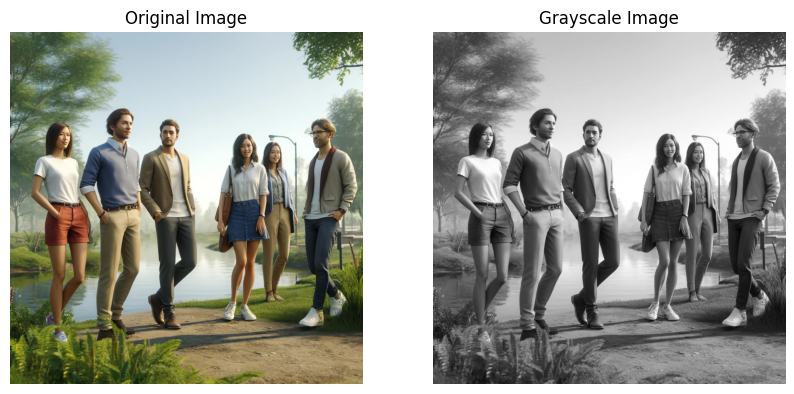

In [32]:
# Your solution goes here: (if you need more code/markdown cells, feel free to insert them as you see fit)

image_path = 'img/Personen_im_Park.jpg' 
image = cv2.imread(image_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.show()

*Your assessment goes here:* 



### Comparing upper body detectors

Your task is to compare the default face detector to an alternative one and to interpret the results.
* <div style="color:blue">Start by loading the image of people at a lake in the park from which you should create a grayscale version and display both side by side</div>
* <div style="color:blue">Use the default upper body detector as well as an alternative one and compare the results both visually as well as through an assessment.</div>

**Hint:** it might take you some time to find an alternative Haar cascade for the upper body, but it might be well worth it (it might make sense to include "Modesto Castrillon-Santana" or "mcs" in your respective searches).

In [24]:
# Your solution goes here: (if you need more code/markdown cells, feel free to insert them as you see fit)



*Your assessment goes here:* 



### Critical assessment of detectors

It is now time to reflect on the usefulness of the Haar cascade detectors
* <div style="color:blue">Critically assess the usefulness of the detectors based on the experiments in this notebook. Can you generalize? What might be a compounding factor here?</div>

*Your assessment goes here:*

